<div align="center"> <b>Exploratory Data Analysis</b> </div>
Let's get acquainted with the dataset first. The provided archive (takehome.1e15ea7.tar.gz) was downloaded and unzipped to the 'data' folder. We will start our EDA by examining the general structure of this data.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
data_folder_name = "data"

In [2]:
with open(os.path.join(data_folder_name, ".manifest"), "r") as file:
    contents = file.read()
    
print(contents)

1e15ea79975f3a2f1e665cc79a6c5619f336c42a,HEAD
c48c1f6fd6cd065fb3f01eb46bf45dcdbc3044ac,_output/public/metadata.csv
0514237cd80b9666a4be721e5c782ec359e1136e,_output/public/orders.csv
9b09187059edd1137ba00a710c9abb0f05eeae80,_output/public/station_000.csv
dc14b44f9ef5e03be91549502b37a1794fb172ba,_output/public/station_001.csv
034a1c93ab4bbc50492e5c84c9773098d700c1be,_output/public/station_002.csv
003041a24c730e24d90d86de97816e9eb3a68cba,_output/public/station_003.csv
4c94977cad1c424b477700e700e989de89af535c,_output/public/station_004.csv
fe96977fc45be618f31913bcc3bde3e6665317a1,_output/public/station_005.csv
a5d353876ea0d6c19ea39f311f52ac4ee1a4fb2f,_output/public/station_006.csv
15c780ac00d506ada5fa38a61fe8b70508549bcc,_output/public/station_007.csv
e5de4812d2e4e5a225d06bd4a931b25fcc281e5f,_output/public/station_008.csv
d918672c76463ebc55fa255e098c871a438eddee,_output/public/station_009.csv
f50636cc6682521dd5f06b84a10563944bdd50f2,_output/public/station_010.csv
d8c8692c17f397e2c8f8822c86

In [3]:
metadata = pd.read_csv(os.path.join(data_folder_name, "metadata.csv"), index_col = 'id')
print('Total number of entries:', len(metadata))
metadata.head(10)

Total number of entries: 50


,country,tank_size
id,,
0,UTO,500
1,COD,1000
2,RHB,1000
3,RHB,750
4,BRY,1000
5,OAK,500
6,OAK,750
7,UTO,500
8,BRY,500


In [4]:
orders = pd.read_csv(os.path.join(data_folder_name, "orders.csv"))
print('Total number of entries:', len(orders))

print('\nTotal number of stations:', len(orders['station'].unique()))
product_types = set(orders['product_ordered'].unique())
print('\nProducts types ordered:', product_types) #29 different types
orders.head(20)

Total number of entries: 2075

Total number of stations: 50

Products types ordered: {'strawberry', 'pomegranate', 'pear', 'raspberry', 'cranberry', 'blueberry', 'eucalyptus', 'water', 'mackerel', 'oolong', 'key_lime', 'lemonade', 'coconut', 'acai', 'lime', 'cucumber', 'earl_grey_tea', 'green_tea', 'pine_needle', 'mint', 'lemon', 'tuna_fish', 'peach', 'grapefruit', 'mango', 'cherry', 'lemon_lime', 'blackberry', 'orange'}


,product_ordered,station,timestamp
0,water,0,2019-01-06 07:33:10.088510
1,water,0,2019-01-13 20:40:38.796702
2,peach,0,2019-01-16 17:35:08.413864
3,pine_needle,0,2019-01-16 17:46:13.652778
4,acai,0,2019-01-16 17:57:22.853341
5,water,0,2019-01-21 12:05:48.988376
6,water,0,2019-01-28 17:08:54.826863
7,water,0,2019-02-05 05:38:22.455303
8,cherry,0,2019-02-09 05:22:19.895710
9,pine_needle,0,2019-02-09 05:40:14.470179


As we can see, the orders table includes product orders for various vitamin-enriched flavors, and plain water. However it does not contain orders for: 
* Carbon dioxide which is also a consumable and must be replaced (per section 2.3 "Operating model" of the problem statement).
* Recyclable paper cups (per section 2.4.1 "User experience" the person is issued a recyclable paper cup if they don’t already have a container)

This may be acceptable, as our main goal is to look into flavor preferences. We don't have to develop a re-supply schedule / system.

The total number of unique station IDs (50) is consistent between all data sources.

In [5]:
station_csv_list = sorted([os.path.join(data_folder_name, fname) for fname in os.listdir(data_folder_name) if fname[:7] == 'station'])

station_df = pd.read_csv(station_csv_list[0])
print('Number of entries:', len(station_df))
print('\nFields:', list(station_df))
print('\nFlavors:', station_df['flavor_name'].unique())
station_df.head(5)

Number of entries: 12463

Fields: ['amount_vended_L', 'flavor_id', 'flavor_levels_after', 'flavor_name', 'tank_level_after', 'timestamp']

Flavors: ['mint' 'strawberry' 'pear' 'water' 'peach' 'acai' 'pine_needle' 'cherry'
 'cucumber' 'lime' 'cranberry' 'grapefruit' 'blueberry' 'oolong'
 'lemon_lime' 'green_tea']


,amount_vended_L,flavor_id,flavor_levels_after,flavor_name,tank_level_after,timestamp
0,1.0,22,"499,500,500",mint,499.0,2019-01-01 02:30:35.185654
1,0.5,22,"498,500,500",mint,498.5,2019-01-01 03:35:02.746804
2,1.0,20,"498,500,499",strawberry,497.5,2019-01-01 04:13:23.046128
3,1.0,22,"497,500,499",mint,496.5,2019-01-01 04:38:28.985597
4,1.0,13,"497,499,499",pear,495.5,2019-01-01 05:03:36.390141


Now we'll combine data from all stations into a single dataframe and perform some additional data validation

In [6]:
station_data = [pd.read_csv(fname).assign(station_id = i) for i, fname in enumerate(station_csv_list)]
main_df = pd.concat(station_data, axis = 0, ignore_index = True) 

main_df['flavor_levels_after'] = main_df['flavor_levels_after'].apply(lambda x: x.split(','))
main_df[['flav1_lvl_after','flav2_lvl_after','flav3_lvl_after']] = \
    pd.DataFrame(main_df['flavor_levels_after'].tolist(), index = main_df.index)

main_df = main_df.merge(metadata, left_on = 'station_id', right_on = metadata.index, suffixes = (None, None))

main_df = main_df.astype({'flavor_name': 'category','timestamp':'datetime64[ns]', 'station_id': 'category',
                          'flav1_lvl_after': 'int16', 'flav2_lvl_after': 'int16', 'flav3_lvl_after': 'int16'})

main_df.head()

,amount_vended_L,flavor_id,flavor_levels_after,flavor_name,tank_level_after,timestamp,station_id,flav1_lvl_after,flav2_lvl_after,flav3_lvl_after,country,tank_size
0,1.0,22,"[499, 500, 500]",mint,499.0,2019-01-01 02:30:35.185654,0,499,500,500,UTO,500
1,0.5,22,"[498, 500, 500]",mint,498.5,2019-01-01 03:35:02.746804,0,498,500,500,UTO,500
2,1.0,20,"[498, 500, 499]",strawberry,497.5,2019-01-01 04:13:23.046128,0,498,500,499,UTO,500
3,1.0,22,"[497, 500, 499]",mint,496.5,2019-01-01 04:38:28.985597,0,497,500,499,UTO,500
4,1.0,13,"[497, 499, 499]",pear,495.5,2019-01-01 05:03:36.390141,0,497,499,499,UTO,500


In [7]:
print('Sets of ordered products and consumed products match: ', \
      set(main_df['flavor_name'].unique()) == product_types)
print('Amounts vended:', main_df['amount_vended_L'].unique()) #per problem definition it can be "up to" 0.5 or 1.0L
print('Min tank level in the dataset:', min(main_df['tank_level_after']))
print('Min flavor levels in the dataset:', min(main_df['flav1_lvl_after']), min(main_df['flav2_lvl_after']), min(main_df['flav3_lvl_after']))

Sets of ordered products and consumed products match:  True
Amounts vended: [1.  0.5]
Min tank level in the dataset: 0.0
Min flavor levels in the dataset: 0 0 0


Overall, the dataset looks clean. It looks like our dispensers may occasionally run out of water, or out of flavors.

Now that we've done basic sanity checking, let's have a closer look at the insights we can get from this data.

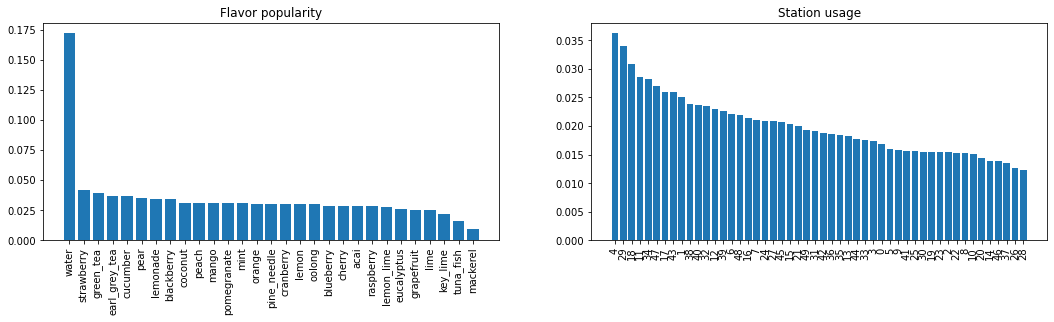

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_figwidth(18)
flavors = main_df['flavor_name'].value_counts(normalize=True) #this doesn't account for the order sizes (0.5 vs 1.0 L)
station_ids = main_df['station_id'].value_counts(normalize=True)
station_ids.index = station_ids.index.map(str)
ax1.bar(flavors.index, flavors.values)
ax2.bar(station_ids.index, station_ids.values)

ax1.set_title('Flavor popularity')
ax2.set_title('Station usage')
ax1.set_xticklabels(flavors.index, rotation = 90)
ax2.set_xticklabels(station_ids.index, rotation = 90);

Plain water is the most popular item, the rest of the distribution is relatively uniform, except for some particularly unpopular flavors like mackerel and tuna fish. Station usage distribution is not uniform, the most used station (#4) had ~3x number of purchases compared to the least used station (#28).

In [9]:
print('Earliest entry:', min(main_df['timestamp']))
print('Last entry:', max(main_df['timestamp']))
print('Time range:', max(main_df['timestamp']) - min(main_df['timestamp']))

Earliest entry: 2019-01-01 01:00:18.259842
Last entry: 2019-06-01 20:05:40.100509
Time range: 151 days 19:05:21.840667


Now let's have a cursory glance at time trends for each flavor. For now, we'll ignore high-frequency time signals (e.g. morning vs evening), and focus instead on day-to-day and month-to-month variation.

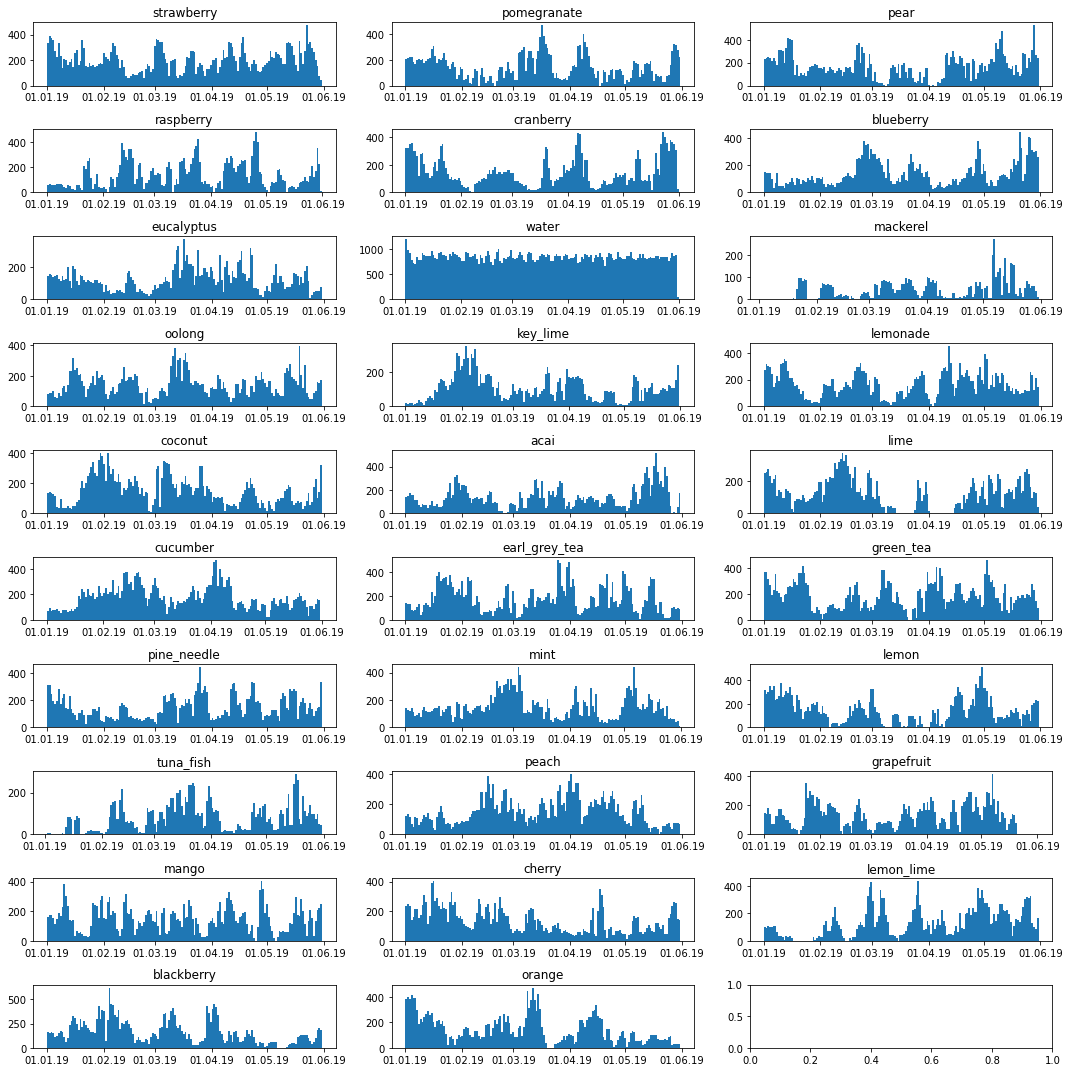

In [10]:
row_num, col_num = 10, 3 # we have only 29 flavors, not 30, so the last chart will be empty
fig, axes = plt.subplots(nrows = row_num, ncols = col_num) 
fig.set_figheight(15)
fig.set_figwidth(15)

for ind, prod in enumerate(product_types ):
    axes[ind // col_num, ind % col_num].xaxis.set_major_formatter(md.DateFormatter('%d.%m.%y')) #'%d.%m.%y'
    axes[ind // col_num, ind % col_num].hist(main_df[main_df.flavor_name == prod]['timestamp'], bins = 152) 
    axes[ind // col_num, ind % col_num].set_title(prod)

plt.tight_layout()

We can see different time trends for different product types. While the demand for water is relatively constant, the same can't be said for flavored seltzers.

Now, let's have a look at individual dispensers:

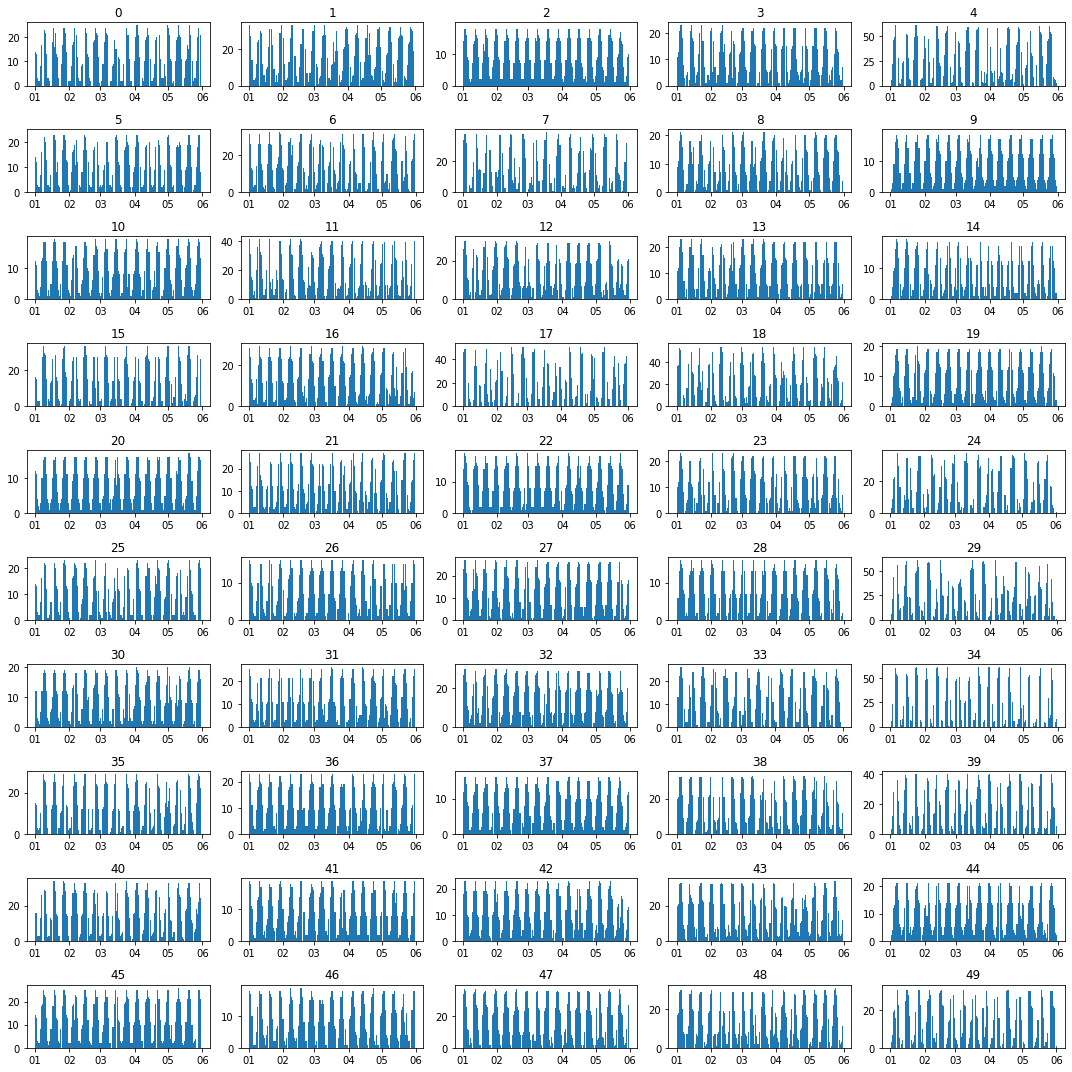

In [11]:
row_num, col_num = 10, 5
fig, axes = plt.subplots(nrows = row_num, ncols = col_num)
fig.set_figheight(15)
fig.set_figwidth(15)

dispensers = main_df['station_id'].unique()
for ind, disp in enumerate(dispensers):
    axes[ind // col_num, ind % col_num].xaxis.set_major_formatter(md.DateFormatter('%m'))
    axes[ind // col_num, ind % col_num].hist(main_df[main_df.station_id == disp]['timestamp'], bins = 152*8)
    axes[ind // col_num, ind % col_num].set_title(disp)

plt.tight_layout()

We can see various periodic signal components in their sales data. This could be something worth investigating deeper and/or discussing with the customer - what could be the cause of this periodicity? It could be location-specific demand variation (e.g. day-night cycle and weekday-weekend cycle). Or it could be weather-related - it was mentioned that the dispensers are solar-powered and not connected to the grid. It may also have something to do with the failure to restock dispensers on time (we know from our data validation results that this did happen), or from mechanical failures.

Another important takeway from these plots is that all stations operated (continuously or intermittently) throughout the whole ~152 day time window. None of them were turned on late, or permanently taken offline early.

Nex, let's have a look at country-level data:

In [12]:
print('Number of stations per country:')
metadata.groupby(['country']).size()

Number of stations per country:


country
BRY    11
COD     7
OAK    12
RHB     5
SUN     3
UTO    12
dtype: int64

In [13]:
print('Number of sales for each country-product combination:')
main_df.groupby(['flavor_name', 'country']).size().unstack(fill_value=0)

Number of sales for each country-product combination:


country,BRY,COD,OAK,RHB,SUN,UTO
flavor_name,,,,,,
acai,3955,1482,5419,1973,0,8111
blackberry,4928,2604,7730,3464,982,5446
blueberry,3464,1973,3782,982,1973,9035
cherry,6428,4428,2387,1932,2347,3446
coconut,7682,3955,3964,857,491,5900
cranberry,3464,4833,6595,1982,1875,3657
cucumber,5226,3562,7887,1973,1473,6919
earl_grey_tea,5155,5900,6910,1881,2963,4428
eucalyptus,2155,2443,3931,1430,0,8893


Finally, we need to keep in mind that the amount vended (in L) may not be constant - it can be either 0.5 L or 1.0 L:

In [14]:
print('Average vended volume per sale:')
main_df[['amount_vended_L', 'country', 'flavor_name']].pivot_table(index = ['flavor_name'], columns = 'country', aggfunc = np.mean, fill_value = np.nan

Average vended volume per sale:


amount_vended_L                                          \
country                   BRY       COD       OAK       RHB       SUN   
flavor_name                                                             
acai                 0.800126  0.794872  0.800978  0.804866       NaN   
blackberry           0.807123  0.811060  0.806533  0.807304  0.803971   
blueberry            0.808747  0.811961  0.807774  0.784623  0.805373   
cherry               0.812072  0.807588  0.806452  0.807971  0.802514   
coconut              0.810271  0.805436  0.809410  0.804551  0.807536   
cranberry            0.810335  0.811918  0.812282  0.805752  0.816000   
cucumber             0.814485  0.810500  0.809623  0.800304  0.811948   
earl_grey_tea        0.803686  0.807966  0.807742  0.815524  0.811677   
eucalyptus           0.803480  0.792468  0.808700  0.799650       NaN   
grapefruit           0.811235  0.808114  0.806874  0.818804       NaN   
green_tea            0.810954  0.809139  0.811505  0.817760  0.800469   
key_lime             0.810626  0.806311  0.814552  0.805041  0.787162   
lemon                0.808404  0.814057  0.812311  0.799193  0.814800   
lemon_lime           0.809224  0.813466  0.808013  0.812215  0.797662   
lemonade             0.810348  0.806342  0.810829  0.805752  0.813765   
lime                 0.810958  0.807879  0.803320  0.808160  0.817000   
mackerel             0.805510  0.811961  0.802732  0.788462  0.820724   
mango                0.810476  0.816499  0.818601  0.805313  0.814554   
mint                 0.806153  0.806412  0.809456  0.803229  0.805000   
oolong               0.808813  0.811609  0.809101  0.814242  0.808554   
orange               0.809761  0.814514  0.816013  0.807518  0.799434   
peach                0.799708  0.813099  0.808802  0.813090       NaN   
pear                 0.810729  0.812626  0.808486  0.818496  0.812288   
pine_needle          0.804177  0.796695  0.807045  0.804878  0.795210   
pomegranate          0.810958  0.810670  0.808800  0.807010  0.807026   
raspberry            0.808717  0.801184  0.810696  0.817226  0.812660   
strawberry           0.809975  0.815217  0.809456  0.812245  0.811929   
tuna_fish            0.813753  0.811596  0.806055  0.825792  0.801860   
water                0.805997  0.808340  0.809369  0.807872  0.807354   

                         
country             UTO  
flavor_name              
acai           0.811429  
blackberry     0.815185  
blueberry      0.807914  
cherry         0.804121  
coconut        0.814237  
cranberry      0.810637  
cucumber       0.805680  
earl_grey_tea  0.813460  
eucalyptus     0.810806  
grapefruit     0.814989  
green_tea      0.805218  
key_lime       0.808734  
lemon          0.812422  
lemon_lime     0.812554  
lemonade       0.805878  
lime           0.804776  
mackerel       0.811952  
mango          0.805941  
mint           0.801386  
oolong         0.814082  
orange         0.810892  
peach          0.813194  
pear           0.806958  
pine_needle    0.809089  
pomegranate    0.812179  
raspberry      0.803795  
strawberry     0.808127  
tuna_fish      0.811688  
water          0.809216

As we can see the average volume stayed mostly within the same (~0.8...0.82 L) range for different country-product combinations

<h3> Final thoughts and follow-up questions </h3>

Based on our quick EDA exercise we can say the following:

Overall, the provided data set looks usable and self-consistent. However before starting the modeling exercise I would like to discuss the following with LifeSoda representatives:

* It would be useful to monitor usage of all consumables (that includes carbon dioxide and cups). It could be a modulator of the sales volume as well as affect their profitability. For example, failure to restock paper cups on time would drive sales down in locations where customers don't tend to bring their own containers. As another example: lack of carbon dioxide would affect seltzer sales, but sales of plain water would be unaffected.
* The same goes for getting access to machine uptime data: the provided data only includes sales history with timestamps. So, suppose a certain dispenser sold zero items during a specific time interval: is there a way for us to know why? Was it because there were no potential customers around, or the machine wasn't functional? 
* Both of the aforementioned points could be useful for more in-depth investigation of dispenser-level time trends.

There are a couple of other minor points that I'd like to confirm with the customer:
* per section 2.4.1 ("User experience), users can dispense "up to" 0.5L or 1L. Yet all entries in the provided dataset contained only exact values (either 0.5L or 1.0L) of dispensed liquid. Does that mean that every single customer used up full volume of the liquid the paid for? Or maybe the unused liquid is wasted? If it's the latter - eliminating this waste could be a potentially straightforward way to reduce their expenses.
* Flavor levels decreased by 1 regardless of the dispensed volume. Is it a limitation of the dispensing system?
* The same section 2.4.1. also contained the following phrase: "if the person paid for seltzer, they can either
dispense the whole amount in one flavor or mix and match any flavors that they like up to the prepaid
amount". Yet, each entry contained only 1 value of flavor_name. Does that mean that the ability to mix and match isn't enabled yet? This is something that I would clarify with LifeSoda to make sure I'm not missing something important. 


In [15]:
main_df.index.name = 'entry_num'
main_df.to_csv(os.path.join('data', 'joined_data.csv')) # we'll use this dataframe in our next notebook